In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, optimizers, regularizers
from tensorflow.keras.datasets import imdb

In [5]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

X_train_full = np.zeros((25_000, 10_000))

for i in range(25_000):
    for j in train_data[i]:
        X_train_full[i][j] = 1
        
X_test = np.zeros((25_000, 10_000))

for i in range(25_000):
    for j in test_data[i]:
        X_test[i][j] = 1
        
y_train_full, y_test = train_labels, test_labels

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, 
                                                      test_size = 5_000, random_state = 0)

print('''
For detail on data preprocessing,
see Chapter 3 a
''')


For detail on data preprocessing,
see Chapter 3 a



In [32]:
model_original = models.Sequential([
    layers.Dense(16, activation = 'relu', input_shape = (10_000,)),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])

model_original.compile(loss = 'binary_crossentropy',
                      optimizer = 'adam',
                      metrics = ['accuracy'])

In [33]:
model_underfit = models.Sequential([
    layers.Dense(4, activation = 'relu', input_shape = (10_000,)),
    layers.Dense(4, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])

model_underfit.compile(loss = 'binary_crossentropy',
                      optimizer = 'adam',
                      metrics = ['accuracy'])

In [34]:
model_overfit = models.Sequential([
    layers.Dense(128, activation = 'relu', input_shape = (10_000,)),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])

model_overfit.compile(loss = 'binary_crossentropy',
                      optimizer = 'adam',
                      metrics = ['accuracy'])

In [35]:
history_underfit = model_underfit.fit(X_train, y_train, validation_data = (X_valid, y_valid), 
                   verbose = True, batch_size = 128, epochs = 20)
history_original = model_original.fit(X_train, y_train, validation_data = (X_valid, y_valid), 
                   verbose = True, batch_size = 128, epochs = 20)
history_overfit = model_overfit.fit(X_train, y_train, validation_data = (X_valid, y_valid), 
                   verbose = True, batch_size = 128, epochs = 20)

Epoch 1/20
157/157 [==============================] - 1s 3ms/step - loss: 0.5641 - accuracy: 0.7379 - val_loss: 0.4674 - val_accuracy: 0.8486
Epoch 2/20
157/157 [==============================] - 0s 2ms/step - loss: 0.3926 - accuracy: 0.9013 - val_loss: 0.3546 - val_accuracy: 0.8948
Epoch 3/20
157/157 [==============================] - 0s 2ms/step - loss: 0.2196 - accuracy: 0.9356 - val_loss: 0.2827 - val_accuracy: 0.8924
Epoch 4/20
157/157 [==============================] - 0s 2ms/step - loss: 0.1453 - accuracy: 0.9538 - val_loss: 0.2858 - val_accuracy: 0.8894
Epoch 5/20
157/157 [==============================] - 0s 2ms/step - loss: 0.1063 - accuracy: 0.9675 - val_loss: 0.3219 - val_accuracy: 0.8878
Epoch 6/20
157/157 [==============================] - 0s 2ms/step - loss: 0.0790 - accuracy: 0.9776 - val_loss: 0.3662 - val_accuracy: 0.8878
Epoch 7/20
157/157 [==============================] - 0s 2ms/step - loss: 0.0577 - accuracy: 0.9855 - val_loss: 0.4288 - val_accuracy: 0.8816
Epoch 

Epoch 18/20
157/157 [==============================] - 1s 7ms/step - loss: 1.3944e-05 - accuracy: 1.0000 - val_loss: 0.9995 - val_accuracy: 0.8832
Epoch 19/20
157/157 [==============================] - 1s 7ms/step - loss: 1.2013e-05 - accuracy: 1.0000 - val_loss: 1.0114 - val_accuracy: 0.8832
Epoch 20/20
157/157 [==============================] - 1s 7ms/step - loss: 1.0393e-05 - accuracy: 1.0000 - val_loss: 1.0230 - val_accuracy: 0.8836


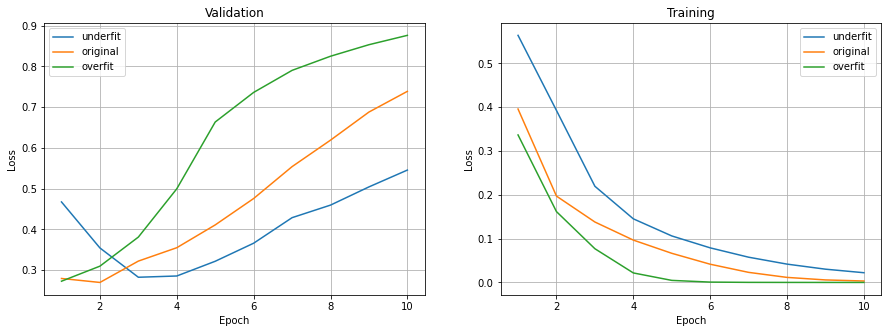

In [55]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))

ax[0].plot(np.arange(1, 11), history_underfit.history['val_loss'][:10], label = 'underfit')
ax[0].plot(np.arange(1, 11), history_original.history['val_loss'][:10], label = 'original')
ax[0].plot(np.arange(1, 11), history_overfit.history['val_loss'][:10], label = 'overfit')
ax[0].set_xlabel('Epoch'); ax[0].set_ylabel('Loss'); ax[0].set_title('Validation')
ax[0].legend(); ax[0].grid()

ax[1].plot(np.arange(1, 11), history_underfit.history['loss'][:10], label = 'underfit')
ax[1].plot(np.arange(1, 11), history_original.history['loss'][:10], label = 'original')
ax[1].plot(np.arange(1, 11), history_overfit.history['loss'][:10], label = 'overfit')
ax[1].set_xlabel('Epoch'); ax[1].set_ylabel('Loss'); ax[1].set_title('Training')
ax[1].legend(); ax[1].grid()

plt.show()

In [48]:
print('''
Let's add some regularizers
''')


Let's add some regularizers



In [52]:
model_l2_01 = models.Sequential([
    layers.Dense(16, activation = 'relu', input_shape = (10_000,), 
                 kernel_regularizer = regularizers.l2(0.01)),
    layers.Dense(16, activation = 'relu', 
                 kernel_regularizer = regularizers.l2(0.01)),
    layers.Dense(1, activation = 'sigmoid')
])

model_l2_01.compile(loss = 'binary_crossentropy',
                      optimizer = 'adam',
                      metrics = ['accuracy'])

model_l2_001 = models.Sequential([
    layers.Dense(16, activation = 'relu', input_shape = (10_000,), 
                 kernel_regularizer = regularizers.l2(0.001)),
    layers.Dense(16, activation = 'relu', 
                 kernel_regularizer = regularizers.l2(0.001)),
    layers.Dense(1, activation = 'sigmoid')
])

model_l2_001.compile(loss = 'binary_crossentropy',
                      optimizer = 'adam',
                      metrics = ['accuracy'])

model_l1_001 = models.Sequential([
    layers.Dense(16, activation = 'relu', input_shape = (10_000,), 
                 kernel_regularizer = regularizers.l1(0.001)),
    layers.Dense(16, activation = 'relu', 
                 kernel_regularizer = regularizers.l1(0.001)),
    layers.Dense(1, activation = 'sigmoid')
])

model_l1_001.compile(loss = 'binary_crossentropy',
                      optimizer = 'adam',
                      metrics = ['accuracy'])

history_l2_01 = model_l2_01.fit(X_train, y_train, validation_data = (X_valid, y_valid), 
                   verbose = True, batch_size = 128, epochs = 20)
history_l2_001 = model_l2_001.fit(X_train, y_train, validation_data = (X_valid, y_valid), 
                   verbose = True, batch_size = 128, epochs = 20)
history_l1_001 = model_l1_001.fit(X_train, y_train, validation_data = (X_valid, y_valid), 
                   verbose = True, batch_size = 128, epochs = 20)

Epoch 1/20
157/157 [==============================] - 1s 4ms/step - loss: 0.6170 - accuracy: 0.8382 - val_loss: 0.4867 - val_accuracy: 0.8750
Epoch 2/20
157/157 [==============================] - 0s 3ms/step - loss: 0.4575 - accuracy: 0.8881 - val_loss: 0.4491 - val_accuracy: 0.8802
Epoch 3/20
157/157 [==============================] - 0s 2ms/step - loss: 0.4202 - accuracy: 0.8954 - val_loss: 0.4323 - val_accuracy: 0.8808
Epoch 4/20
157/157 [==============================] - 0s 2ms/step - loss: 0.4043 - accuracy: 0.8970 - val_loss: 0.4165 - val_accuracy: 0.8820
Epoch 5/20
157/157 [==============================] - 0s 2ms/step - loss: 0.3925 - accuracy: 0.8992 - val_loss: 0.4146 - val_accuracy: 0.8880
Epoch 6/20
157/157 [==============================] - 0s 2ms/step - loss: 0.3823 - accuracy: 0.8996 - val_loss: 0.4086 - val_accuracy: 0.8832
Epoch 7/20
157/157 [==============================] - 0s 3ms/step - loss: 0.3701 - accuracy: 0.9049 - val_loss: 0.4011 - val_accuracy: 0.8852
Epoch 

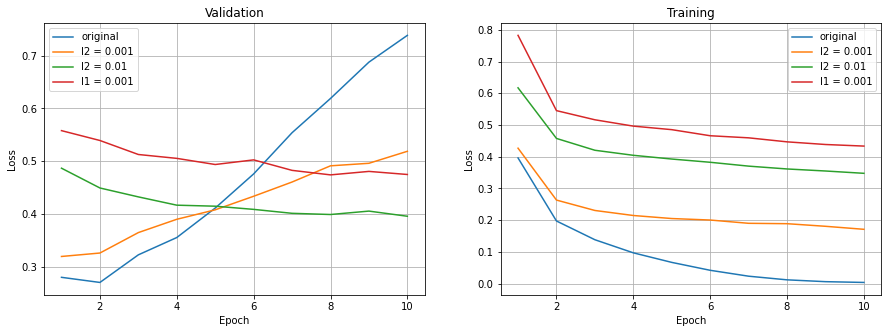

In [57]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))

ax[0].plot(np.arange(1, 11), history_original.history['val_loss'][:10], label = 'original')
ax[0].plot(np.arange(1, 11), history_l2_001.history['val_loss'][:10], label = 'l2 = 0.001')
ax[0].plot(np.arange(1, 11), history_l2_01.history['val_loss'][:10], label = 'l2 = 0.01')
ax[0].plot(np.arange(1, 11), history_l1_001.history['val_loss'][:10], label = 'l1 = 0.001')
ax[0].set_xlabel('Epoch'); ax[0].set_ylabel('Loss'); ax[0].set_title('Validation')
ax[0].legend(); ax[0].grid()

ax[1].plot(np.arange(1, 11), history_original.history['loss'][:10], label = 'original')
ax[1].plot(np.arange(1, 11), history_l2_001.history['loss'][:10], label = 'l2 = 0.001')
ax[1].plot(np.arange(1, 11), history_l2_01.history['loss'][:10], label = 'l2 = 0.01')
ax[1].plot(np.arange(1, 11), history_l1_001.history['loss'][:10], label = 'l1 = 0.001')
ax[1].set_xlabel('Epoch'); ax[1].set_ylabel('Loss'); ax[1].set_title('Training')
ax[1].legend(); ax[1].grid()

plt.show()

In [59]:
print('''
There's also the l1_l2(l1 = 0.001, l2 = 0.001) regularizer
''')


There's also the l1_l2(l1 = 0.001, l2 = 0.001) regularizer



<tf.Variable 'dense_95/kernel:0' shape=(4, 4) dtype=float32, numpy=
array([[-0.7114269 ,  0.47522742, -0.654242  , -0.81872886],
       [-0.26497793, -0.5150465 , -0.25381565,  0.37703055],
       [-0.26327616,  0.51673216, -0.32950395,  0.43301862],
       [ 0.7959588 , -0.86028785,  0.35241765,  0.05451   ]],
      dtype=float32)>


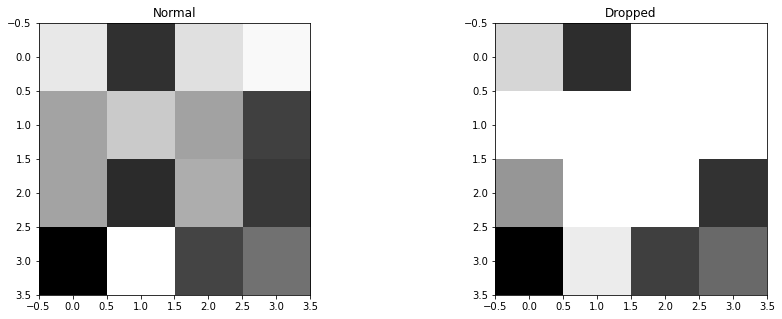

In [107]:
layer = layers.Dense(4, input_shape = (4,))
layer((tf.zeros((1, 4))))
print(np.array(layer.weights[0]))
weights = np.array(layer.weights[0]) + 1

fig, ax = plt.subplots(1, 2, figsize = (15, 5))
ax[0].imshow(weights, cmap = 'gray_r')
ax[0].set_title('Normal')
ax[1].imshow(weights * np.random.randint(0, 2, size = (4, 4)) * 2, cmap = 'gray_r')
ax[1].set_title('Dropped')
plt.show()

In [109]:
model_dropout = models.Sequential([
    layers.Dense(16, activation = 'relu', input_shape = (10_000,)),
    layers.Dropout(0.5),
    layers.Dense(16, activation = 'relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation = 'sigmoid')
])

model_dropout.compile(loss = 'binary_crossentropy',
                      optimizer = 'adam',
                      metrics = ['accuracy'])

history_dropout = model_dropout.fit(X_train, y_train, validation_data = (X_valid, y_valid), 
                                   verbose = True, batch_size = 128, epochs = 20)

Epoch 1/20
157/157 [==============================] - 1s 3ms/step - loss: 0.6135 - accuracy: 0.6738 - val_loss: 0.4749 - val_accuracy: 0.8752
Epoch 2/20
157/157 [==============================] - 0s 2ms/step - loss: 0.4444 - accuracy: 0.8392 - val_loss: 0.3333 - val_accuracy: 0.8884
Epoch 3/20
157/157 [==============================] - 0s 2ms/step - loss: 0.3519 - accuracy: 0.8778 - val_loss: 0.2978 - val_accuracy: 0.8936
Epoch 4/20
157/157 [==============================] - 0s 2ms/step - loss: 0.2931 - accuracy: 0.9000 - val_loss: 0.2853 - val_accuracy: 0.8980
Epoch 5/20
157/157 [==============================] - 0s 2ms/step - loss: 0.2620 - accuracy: 0.9115 - val_loss: 0.2751 - val_accuracy: 0.8908
Epoch 6/20
157/157 [==============================] - 0s 2ms/step - loss: 0.2297 - accuracy: 0.9212 - val_loss: 0.2897 - val_accuracy: 0.8926
Epoch 7/20
157/157 [==============================] - 0s 2ms/step - loss: 0.2158 - accuracy: 0.9259 - val_loss: 0.3258 - val_accuracy: 0.8910
Epoch 

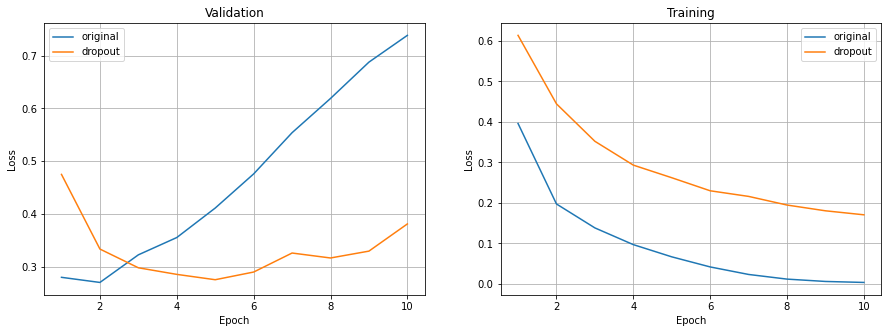

In [110]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))

ax[0].plot(np.arange(1, 11), history_original.history['val_loss'][:10], label = 'original')
ax[0].plot(np.arange(1, 11), history_dropout.history['val_loss'][:10], label = 'dropout')
ax[0].set_xlabel('Epoch'); ax[0].set_ylabel('Loss'); ax[0].set_title('Validation')
ax[0].legend(); ax[0].grid()

ax[1].plot(np.arange(1, 11), history_original.history['loss'][:10], label = 'original')
ax[1].plot(np.arange(1, 11), history_dropout.history['loss'][:10], label = 'dropout')
ax[1].set_xlabel('Epoch'); ax[1].set_ylabel('Loss'); ax[1].set_title('Training')
ax[1].legend(); ax[1].grid()

plt.show()